In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

# EDA and PREPROCESSING

In [2]:
df=pd.read_csv(r'C:\Users\Kingsman\Downloads\train.csv')

In [3]:
df.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
df.shape #size of the data set

(13994, 30)

In [5]:
df.describe()# a glance into the data set

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [6]:
df['selection'].unique() #looking for unique values in the selection column

array([1, 0], dtype=int64)

In [7]:
df['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

In [8]:
df['selection'].value_counts(normalize=True)#to get percentage of values in of target column

1    0.557525
0    0.442475
Name: selection, dtype: float64

In [9]:
df.isna().sum()# checking for null values

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [10]:
df.info()# taking an insight of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [11]:
df.dtypes

player_id                     object
name                          object
age                            int64
gender                        object
country                       object
height                        object
weight                        object
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
matches_played               float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
y

OBSERVATION :

We have a total of  13944 customers information
Numeric features : 1 
String type features : 8
So we might have a total of 10 numeric and 8 categorical input features. Lets explore them one by one.

In [12]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [13]:
summary('data',df)

data shape: (13994, 30)


,dtypes,null,unique,min,median,max,mean,std
player_id,object,0,13994,PLID_10,NaN,PLID_9998,NaN,NaN
name,object,0,13994,Aaron Bay,NaN,Zoraida Williamson,NaN,NaN
age,int64,0,39,16,20.0,61,21.135844,5.162719
gender,object,19,2,NaN,NaN,NaN,NaN,NaN
country,object,0,163,Afghanistan,NaN,Zimbabwe,NaN,NaN
height,object,0,31,1'5,NaN,99'0,NaN,NaN
weight,object,417,88,NaN,NaN,NaN,NaN,NaN
ball_controlling_skills,float64,413,89,5.0,61.0,95.0,56.043958,16.787353
body_reflexes,float64,0,84,12.0,64.0,96.0,61.934329,14.931963
body_balance,float64,0,86,9.0,65.0,97.0,62.753323,14.203638


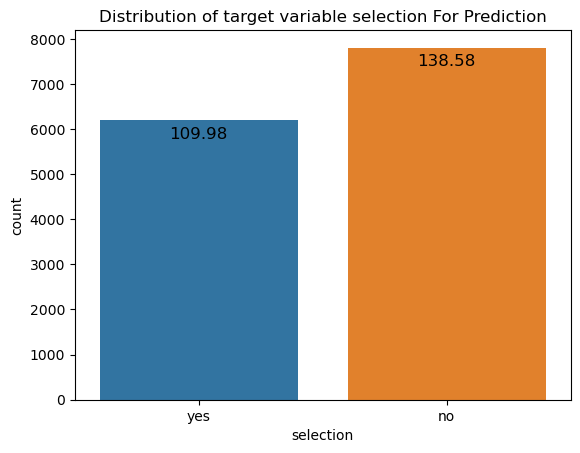

In [14]:
#churn rate
ax = sns.countplot(x='selection', data=df)
x_labels= ['yes', 'no']



ax.set_xticklabels(x_labels)
plt.title('Distribution of target variable selection For Prediction')

for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

In [15]:
# it is a balanced data set

In [16]:
# Function to plot the distribution of numerical variable
def plot_num_var(var_name, var_label, bin_num):
    plt.figure(figsize = (25,5))
    plt.suptitle('Distribution of {}'.format(var_name))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=var_name, bins=bin_num)
  #plt.title('Fig {}(a)'.format(fig_num))
    plt.xlabel(var_name)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=var_name)
 # plt.title('Fig {}(b)'.format(fig_num))
    plt.xlabel(var_name)
  
    plt.show()

In [17]:
# Function to plot the distribution of numerical variable by selection value
def plot_numvar_sel(var_name, var_label, bin_num):
    plt.figure(figsize = (25,5))
    plt.suptitle('Distribution of {} by selection value'.format(var_label))
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=var_name, hue='selection', bins=bin_num)
 # plt.title('Fig {}(a)'.format(fig_num))
    plt.xlabel(var_label)
    plt.ylabel('Count')
  
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x='selection', y=var_name)
  #plt.title('Fig {}(b)'.format(fig_num))
    plt.xlabel('selection')
  
    plt.show()

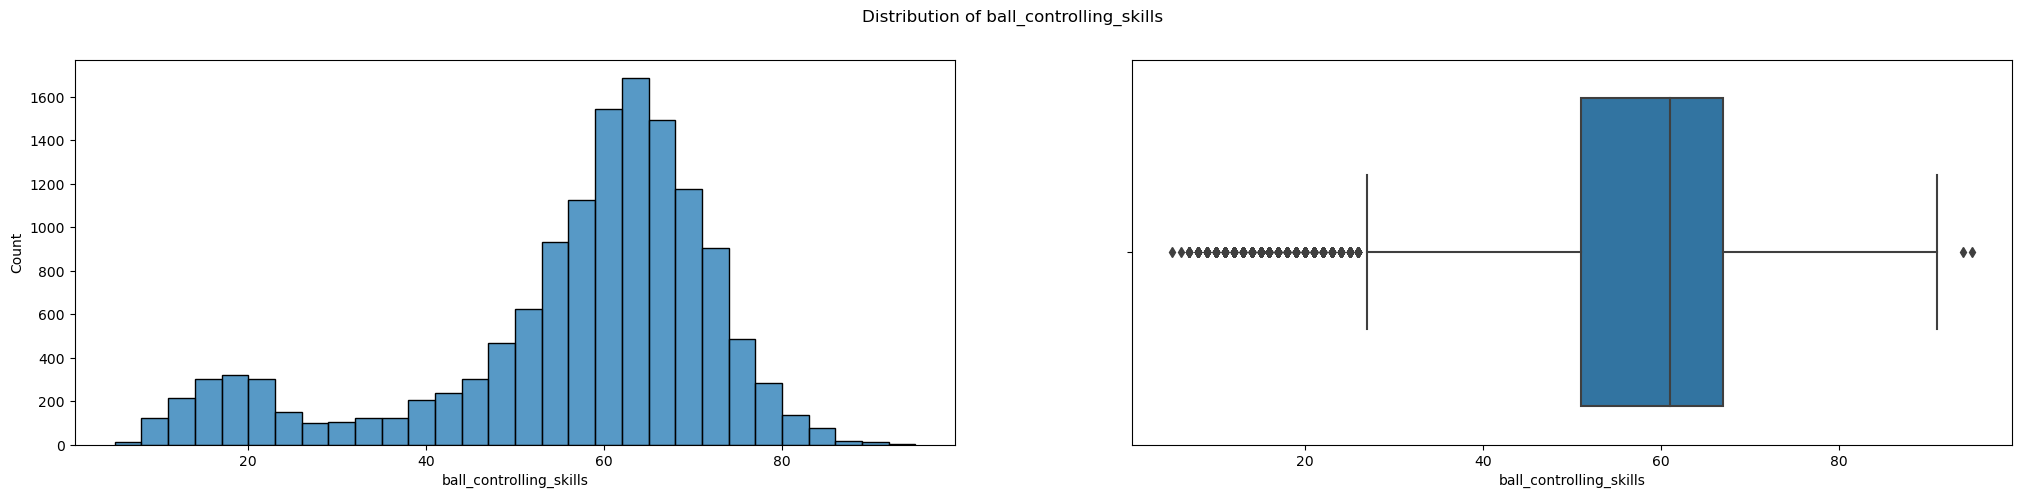

In [18]:
# Distribution of Tenure of the customers with the ecommerce platform
plot_num_var('ball_controlling_skills', 'selection', 30)

In [19]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]
pd.DataFrame(df['ball_controlling_skills'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
ball_controlling_skills,13581.0,56.043958,16.787353,5.0,24.0,47.0,51.0,54.0,58.0,61.0,63.0,65.0,67.0,68.0,72.0,82.0,95.0


In [20]:
df.groupby('selection')['ball_controlling_skills'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
selection,,,,,,,,,,,,,,,,,
0,6023.0,51.032708,16.038627,7.0,20.0,41.0,46.0,49.0,53.0,56.0,59.0,61.0,62.0,63.0,66.0,71.0,76.0
1,7558.0,60.037444,16.293338,5.0,34.7,53.0,56.0,58.0,62.0,64.0,67.0,69.0,70.0,72.0,75.0,83.0,95.0


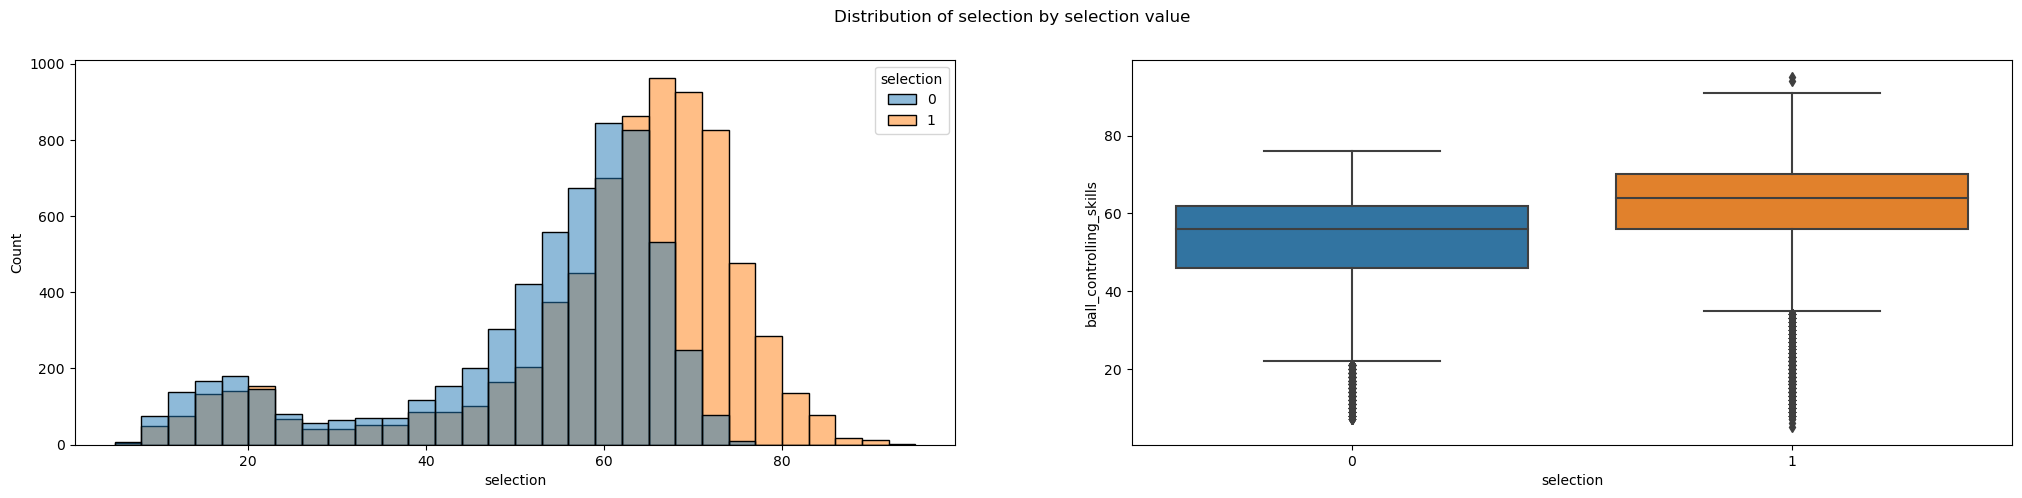

In [21]:
 #Distribution of Tenure of customers by Churn value
plot_numvar_sel('ball_controlling_skills','selection', 30)

In [22]:
df.groupby('selection')['ball_controlling_skills'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
selection,,,,,,,,,,,,,,,,,
0,6023.0,51.032708,16.038627,7.0,20.0,41.0,46.0,49.0,53.0,56.0,59.0,61.0,62.0,63.0,66.0,71.0,76.0
1,7558.0,60.037444,16.293338,5.0,34.7,53.0,56.0,58.0,62.0,64.0,67.0,69.0,70.0,72.0,75.0,83.0,95.0


OBSERVATION:

Most of the customers have ball controlling skill  between 5 to 95 .
Both selections show a spread of values around their respective means, as indicated by the standard deviation values
The percentiles provide insights into how the data is distributed at various points:
For Selection 0, 25% of the values are below 46.0, 50% (median) are below 53.0, and 75% are below 61.0.
For Selection 1, 25% of the values are below 56.0, 50% (median) are below 62.0, and 75% are below 69.0.
The higher percentiles (80%, 90%, 99%) show the values above which a certain percentage of data points fall.
he percentiles can also help identify potential outliers. For example, the 99th percentile for Selection 1 is 95.0, which is the maximum value. This indicates that only 1% of the data points in Selection 1 exceed this value.

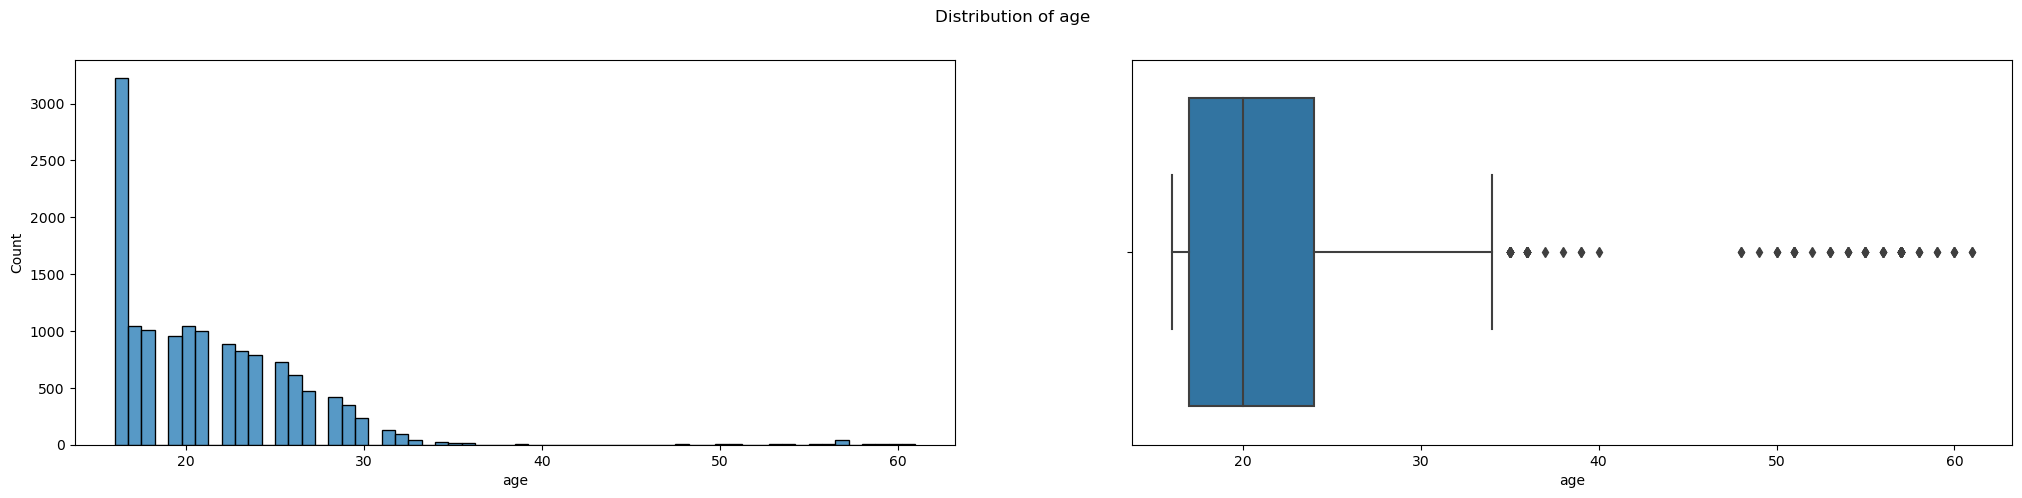

In [23]:
# Distribution of age
plot_num_var('age', 'selection', 60)

In [24]:
percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

pd.DataFrame(df['age'].describe(percentiles=percentiles)).T

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
age,13994.0,21.135844,5.162719,16.0,16.0,16.0,17.0,17.0,19.0,20.0,22.0,23.0,24.0,25.0,28.0,34.0,61.0


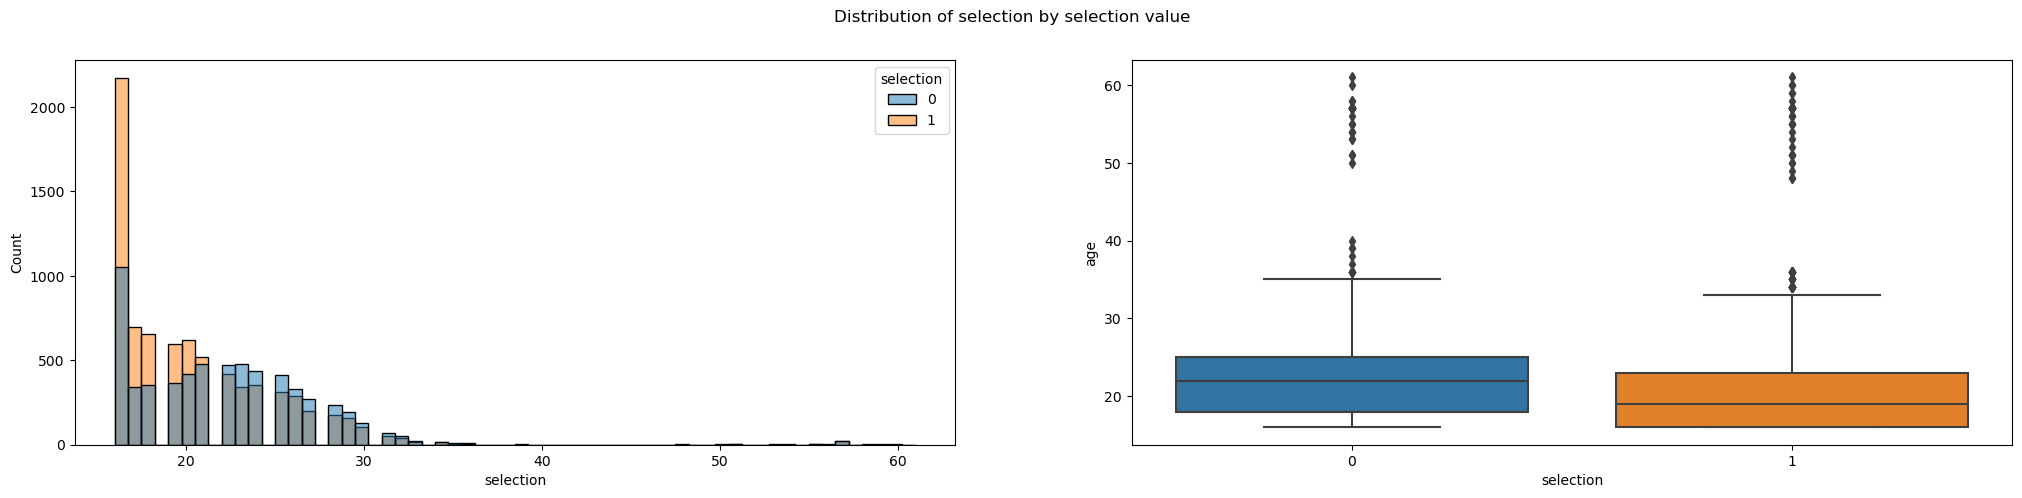

In [25]:
 #Distribution of age by selection value
plot_numvar_sel('age', 'selection', 60)

In [26]:
df.groupby('selection')['age'].describe(percentiles=percentiles)

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,99%,max
selection,,,,,,,,,,,,,,,,,
0,6192.0,22.073805,5.190309,16.0,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0,25.0,26.0,28.0,34.0,61.0
1,7802.0,20.391438,5.017755,16.0,16.0,16.0,16.0,17.0,18.0,19.0,20.0,22.0,23.0,24.0,27.0,33.0,61.0


The percentiles provide insights into the distribution of the data:
For both selections, the 25th percentile is at 18.0, the median (50th percentile) is around 20.0, and the 75th percentile is around 24.0.
The "max" value of 61.0 is the same for both selections, indicating that this is the highest value in the dataset.
Both selections have relatively low standard deviations, suggesting that the data points in each selection are relatively close to the mean.
the data in both selections seems to have a similar distribution pattern, with relatively consistent values across percentiles.

In [27]:
df.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

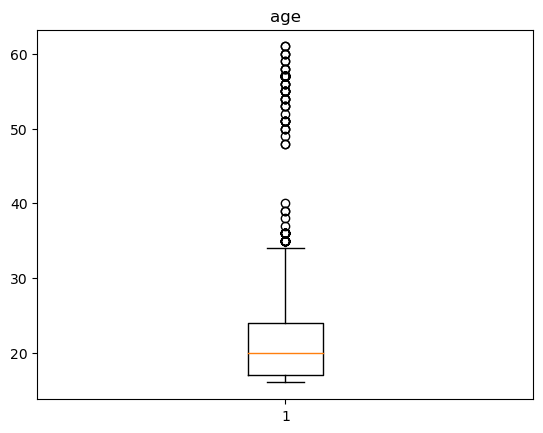

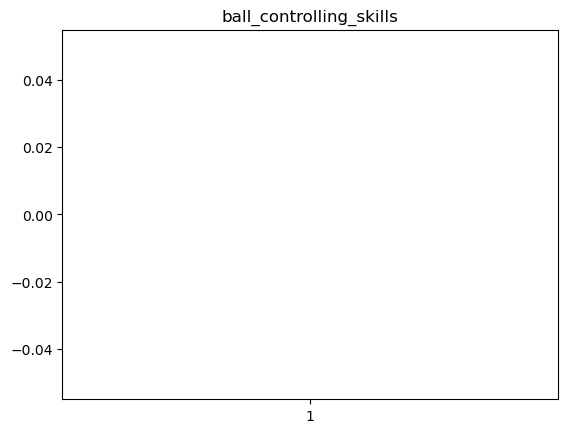

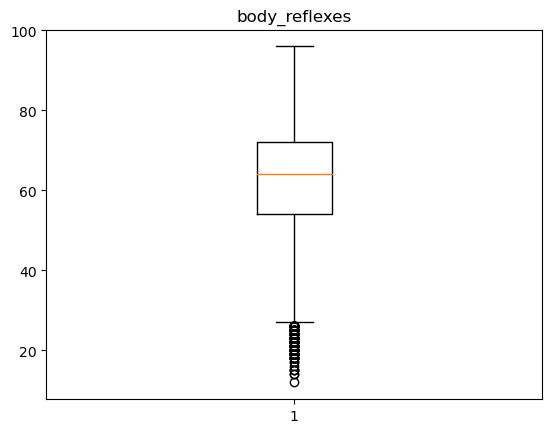

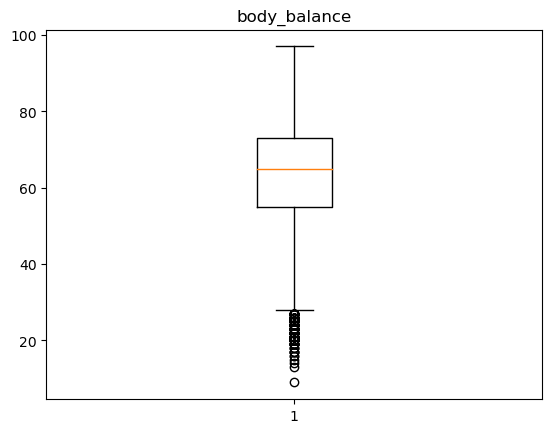

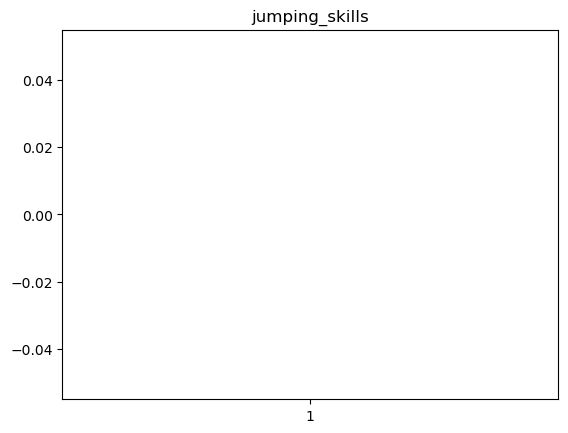

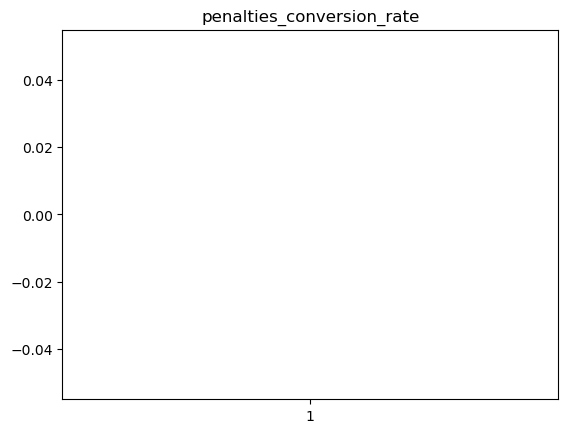

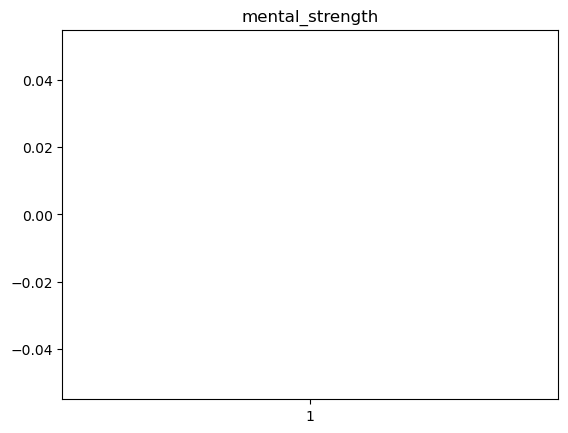

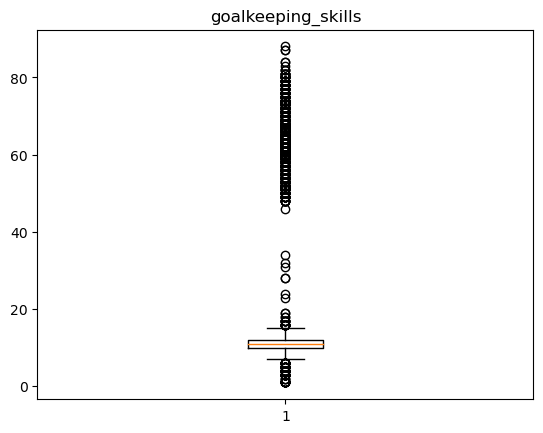

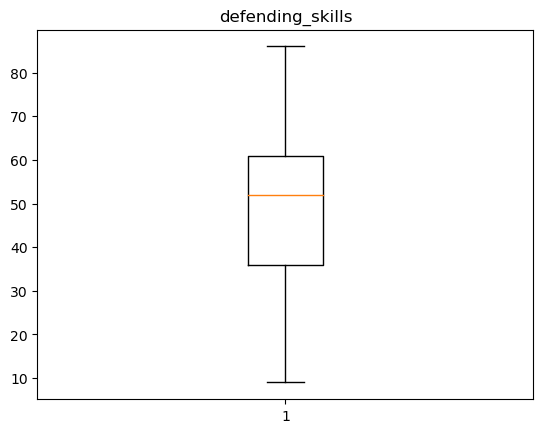

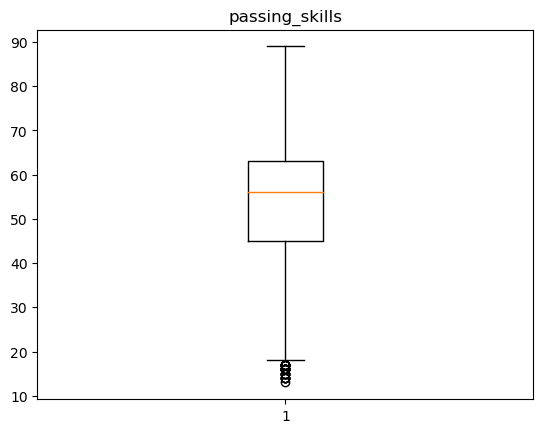

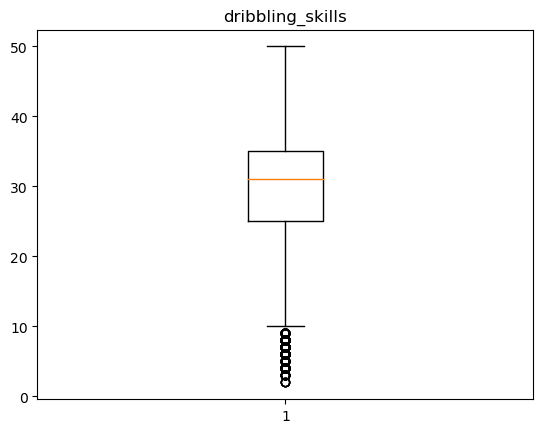

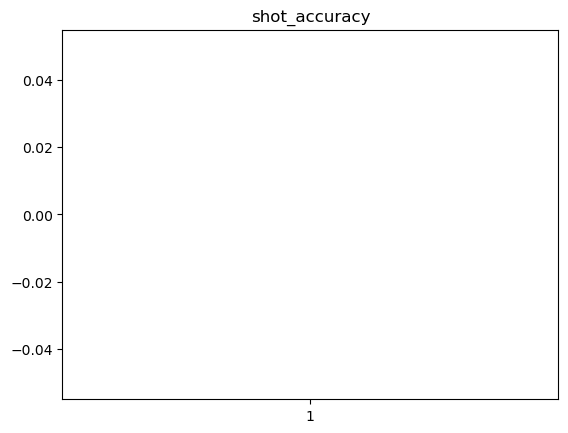

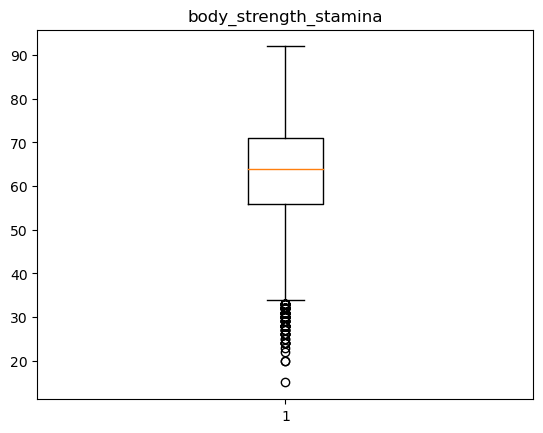

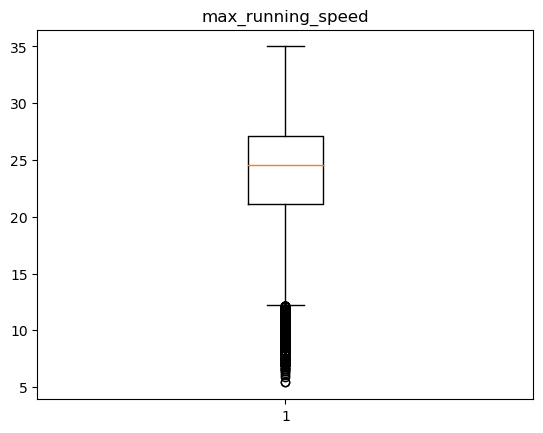

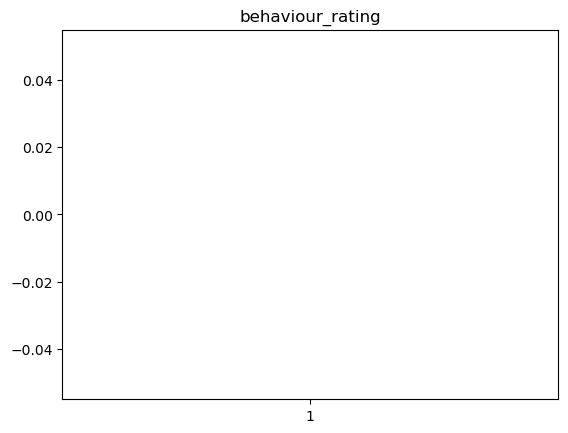

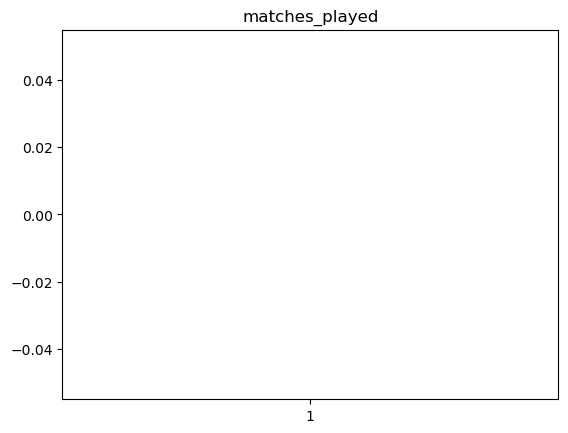

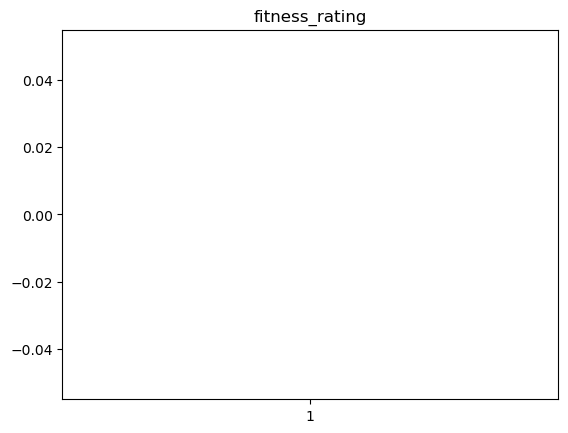

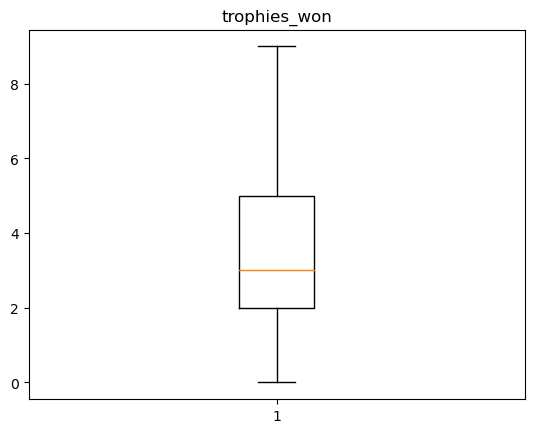

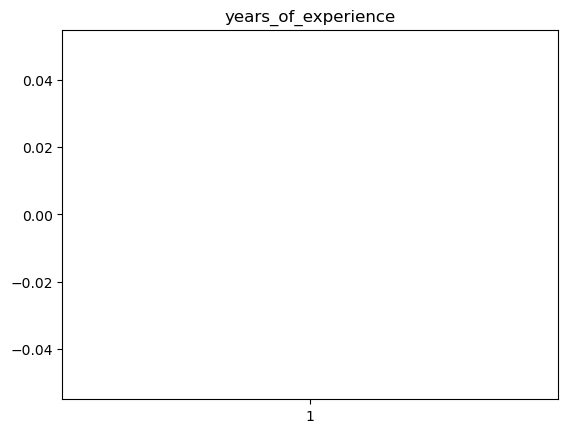

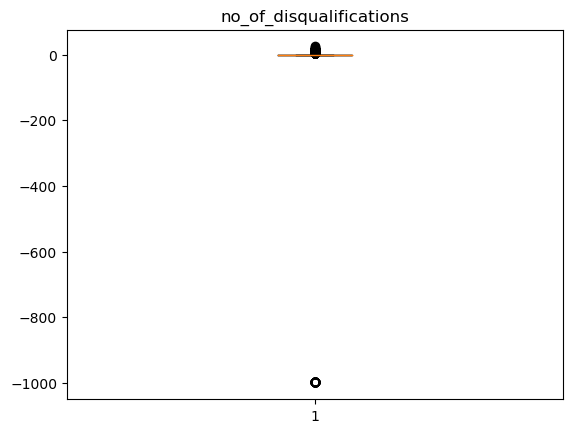

In [28]:
num_cols=[ 'age','ball_controlling_skills', 'body_reflexes', 'body_balance','jumping_skills', 'penalties_conversion_rate', 'mental_strength','goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating','matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications']
for i in num_cols:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

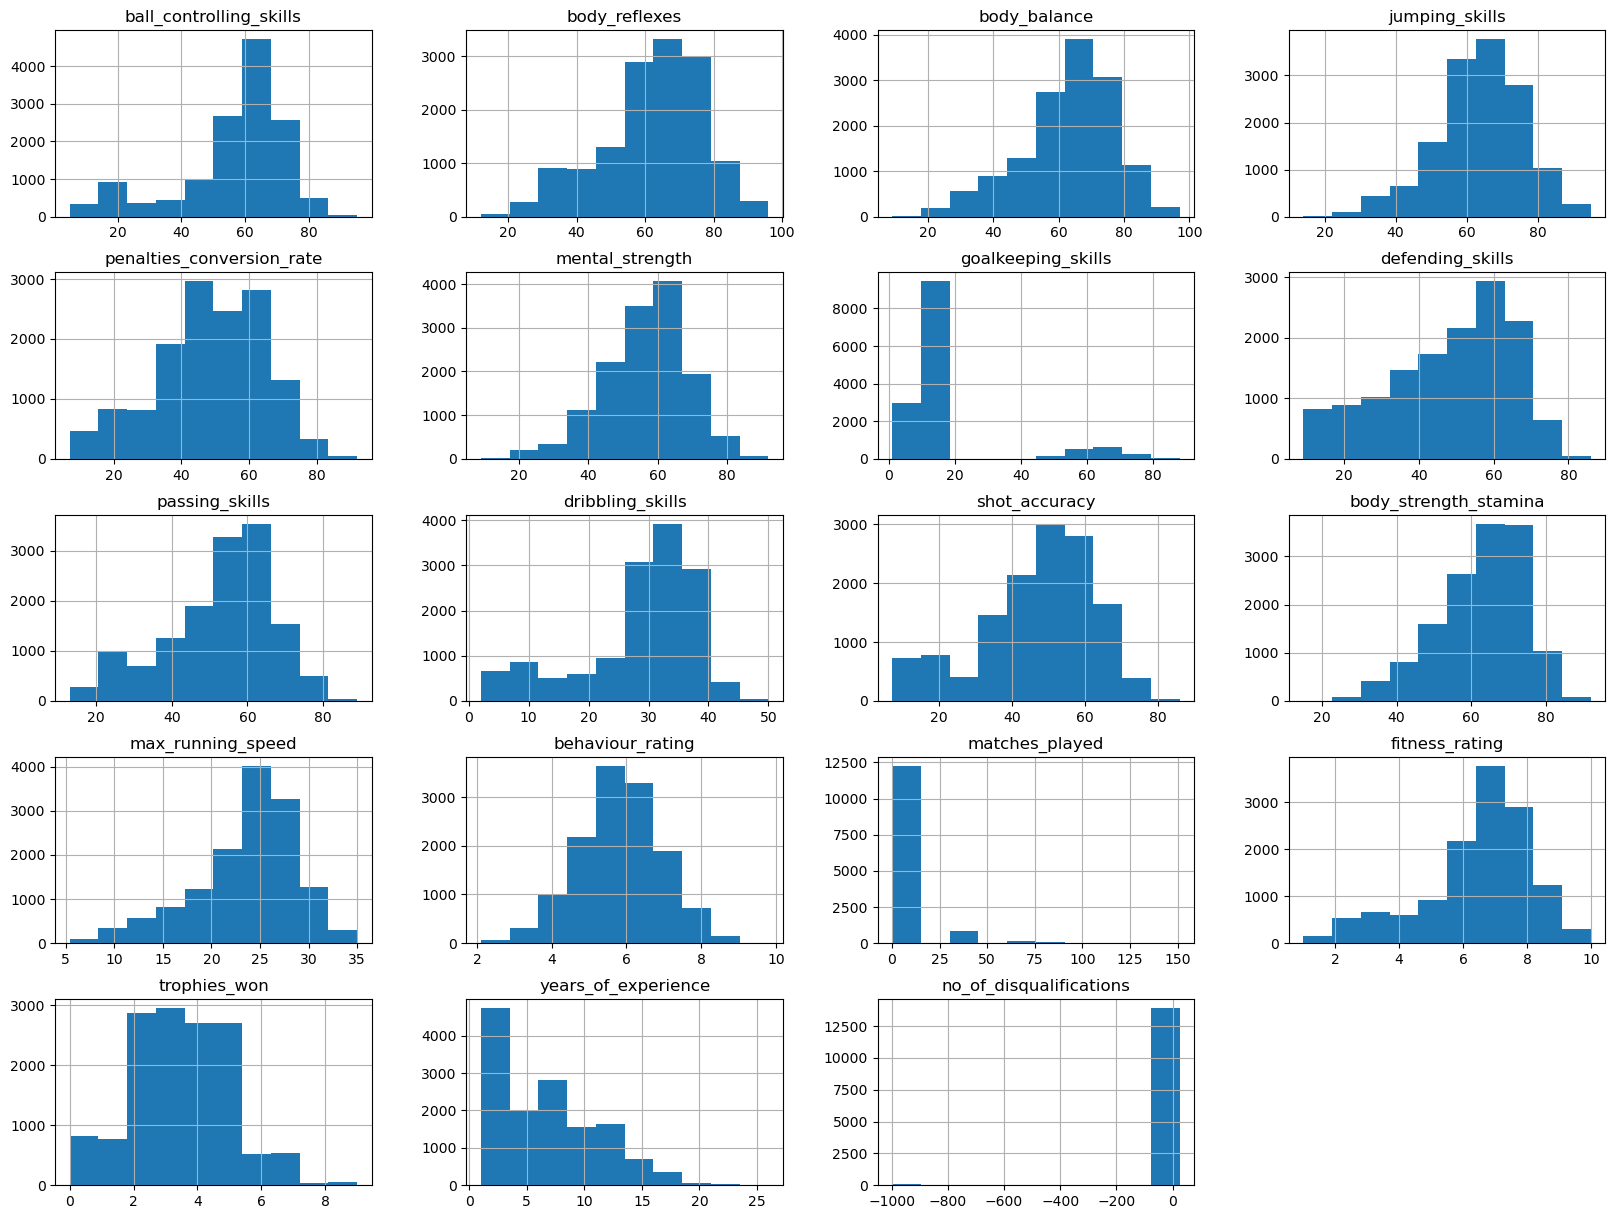

In [29]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [30]:
df2 = df.drop(['player_id','name','country'],axis=1) #dropping columns with most number of unique values

In [31]:
df2.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [32]:
def plotting_percentages(df2, col, target,x_labels):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df2.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    #order_list = list(df[col].unique())
    #order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, height=6, aspect=3)
    g.ax.set_xticklabels(x_labels)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f' {col.title()} By Percent {target.title()}')
    plt.xlabel(f'{col.title()}')
               
    plt.ylabel(f'{target.title()} Percentage', 
               fontdict={'fontsize': 20})
    return g

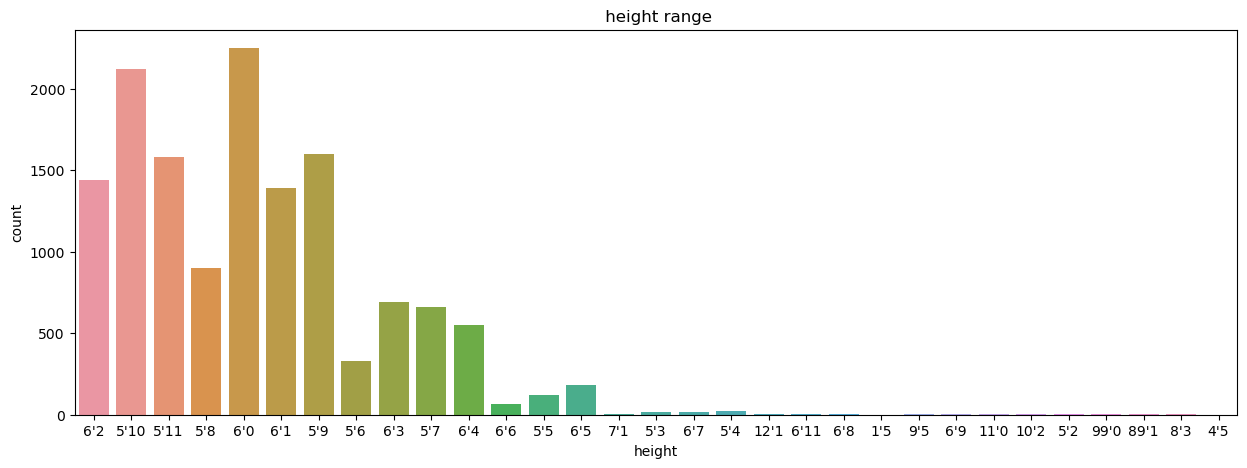

In [33]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='height', data=df)
plt.title(' height range')
plt.show()

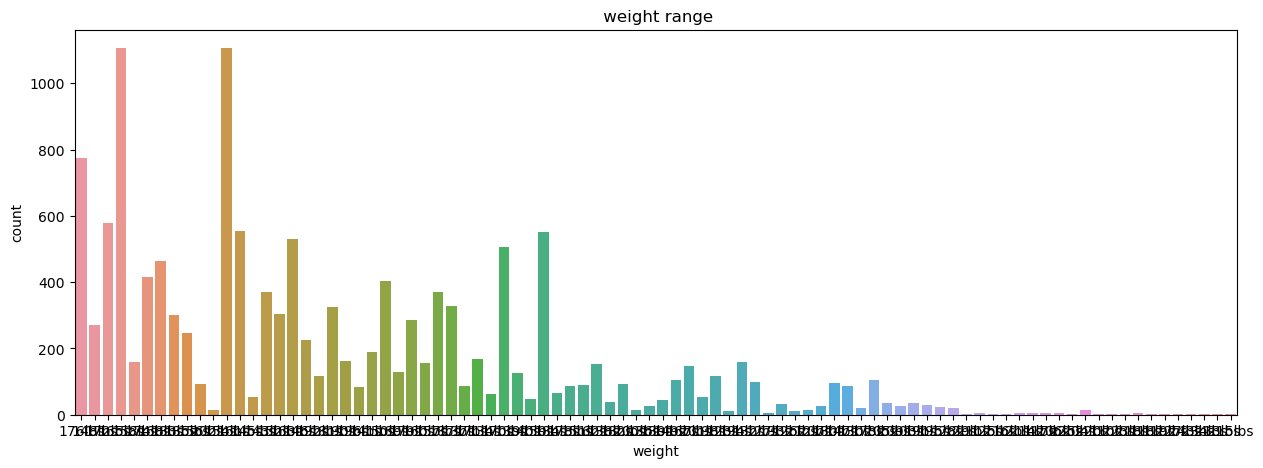

In [34]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='weight', data=df)
plt.title(' weight range')
plt.show()

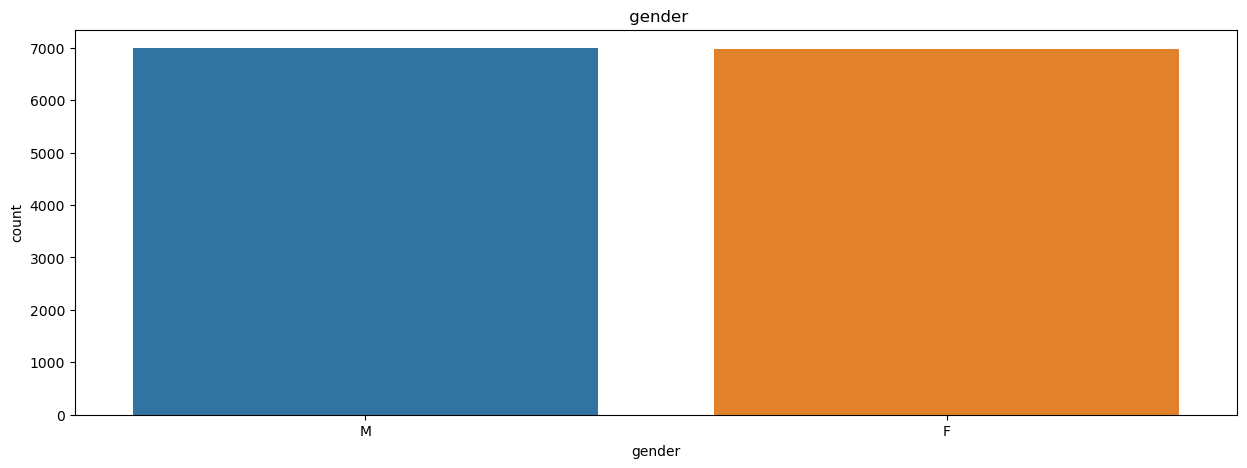

In [35]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='gender', data=df)
plt.title(' gender')
plt.show()

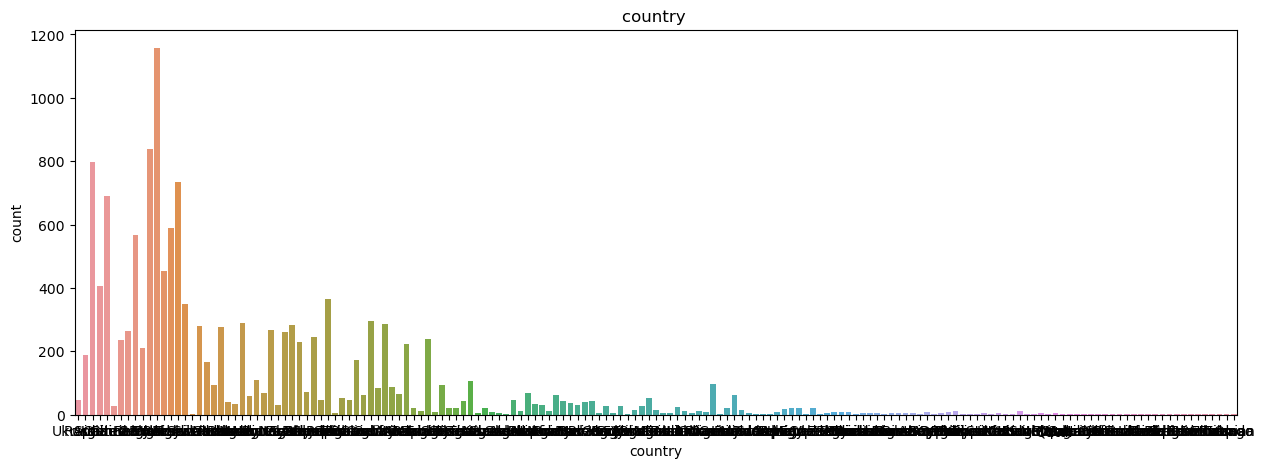

In [36]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='country', data=df)
plt.title('country ')
plt.show()

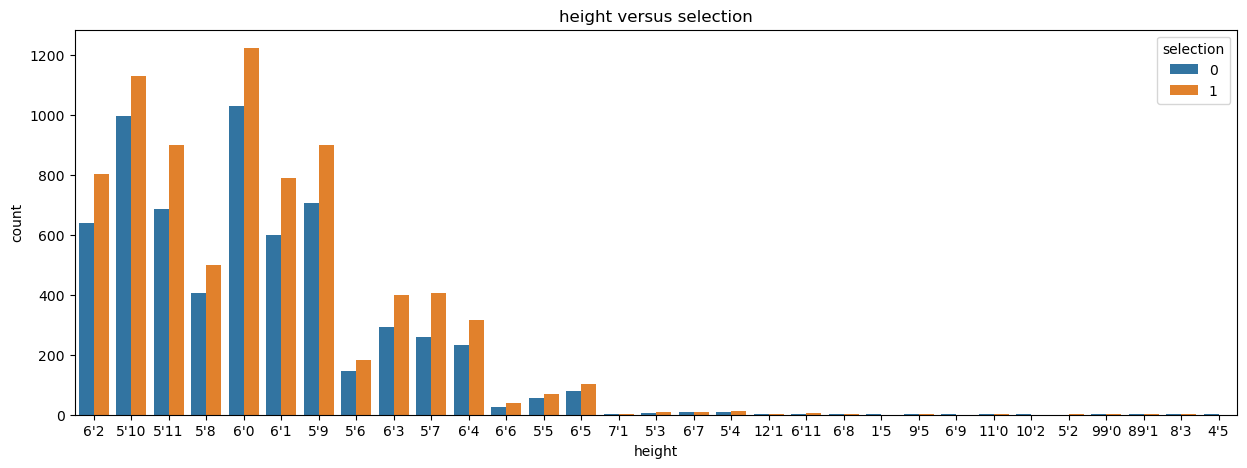

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


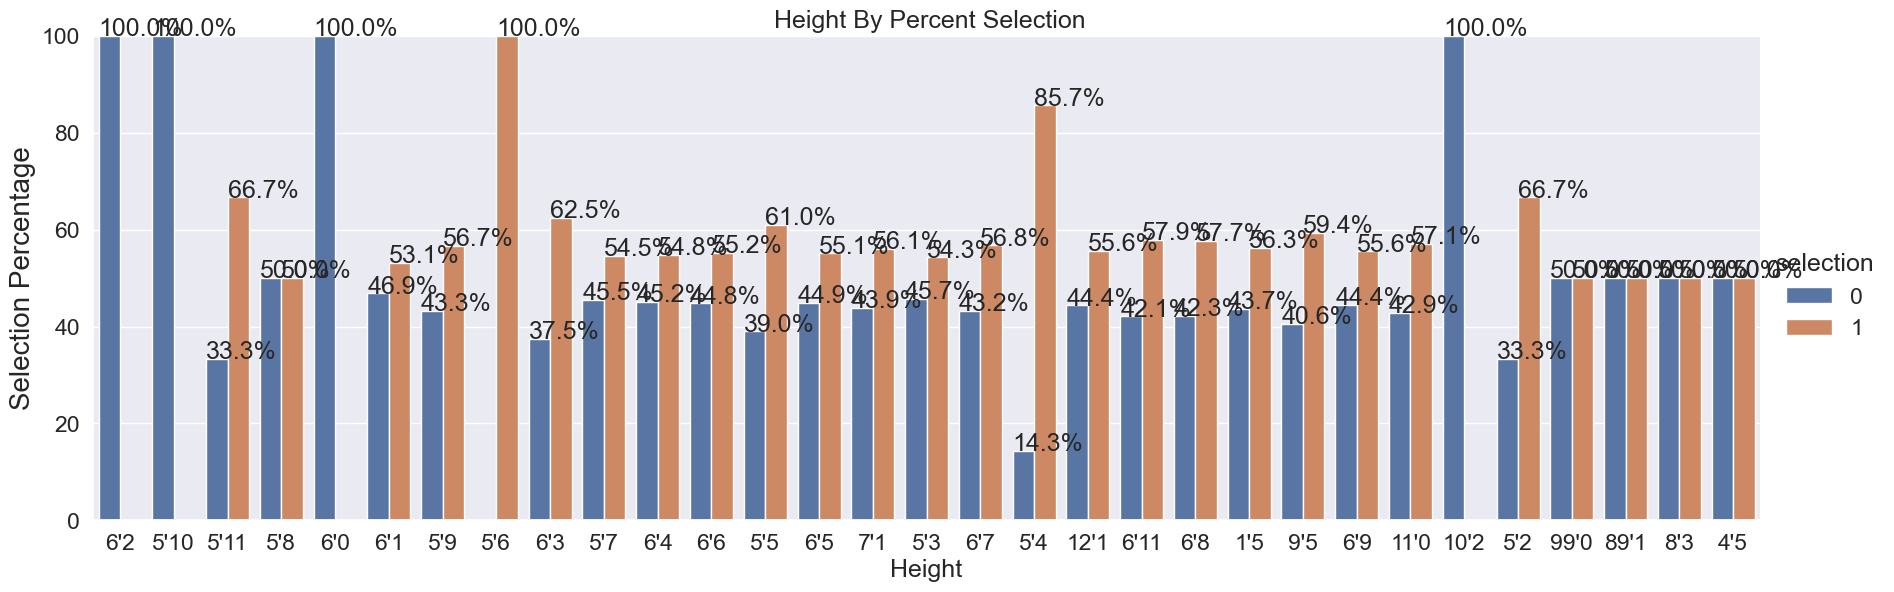

In [37]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='height', hue='selection', data=df2)
plt.title('height versus selection')
plt.show()

plotting_percentages(df2,'height','selection',df2.height.unique())

In [38]:
df['country'].unique()

array(['Ukraine', 'Russia', 'Spain', 'Chile', 'Argentina', 'Guinea',
       'China PR', 'United States', 'Italy', 'Belgium', 'Germany',
       'England', 'Colombia', 'Brazil', 'France', 'Netherlands',
       'Afghanistan', 'Sweden', 'Switzerland', 'Ghana', 'Poland',
       'Iceland', 'Bulgaria', 'Mexico', 'Northern Ireland', 'Uruguay',
       'Ivory Coast', 'Portugal', 'New Zealand', 'Norway',
       'Korea Republic', 'Scotland', 'Greece', 'Denmark', 'Slovakia',
       'Japan', 'Togo', 'Slovenia', 'Finland', 'Australia', 'Paraguay',
       'Republic of Ireland', 'Croatia', 'Saudi Arabia', 'Wales',
       'Czech Republic', 'Austria', 'Georgia', 'Gabon', 'Turkey',
       'Madagascar', 'Serbia', 'Congo', 'Tunisia', 'Canada', 'Senegal',
       'Thailand', 'Kosovo', 'Israel', 'Montserrat', 'Guatemala',
       'Algeria', 'Iraq', 'South Africa', 'Albania', 'Hungary',
       'Honduras', 'Morocco', 'Romania', 'Mali', 'Bosnia Herzegovina',
       'Ecuador', 'DR Congo', 'Burkina Faso', 'Peru', 'K

In [39]:
df2['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [40]:
df2['gender'] = df2['gender'].fillna(df2['gender'].mode())

In [41]:
df2['gender'].value_counts()

M    6992
F    6983
Name: gender, dtype: int64

In [42]:
df2.head()

,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,23,M,6'2,176lbs,77.0,58.0,47.0,59.0,41.0,73.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,18,M,5'10,148lbs,54.0,69.0,70.0,62.0,53.0,43.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,16,F,6'2,172lbs,34.0,43.0,45.0,69.0,49.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,27,M,5'11,165lbs,79.0,73.0,76.0,86.0,81.0,80.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,19,F,5'8,158lbs,47.0,61.0,74.0,57.0,49.0,35.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


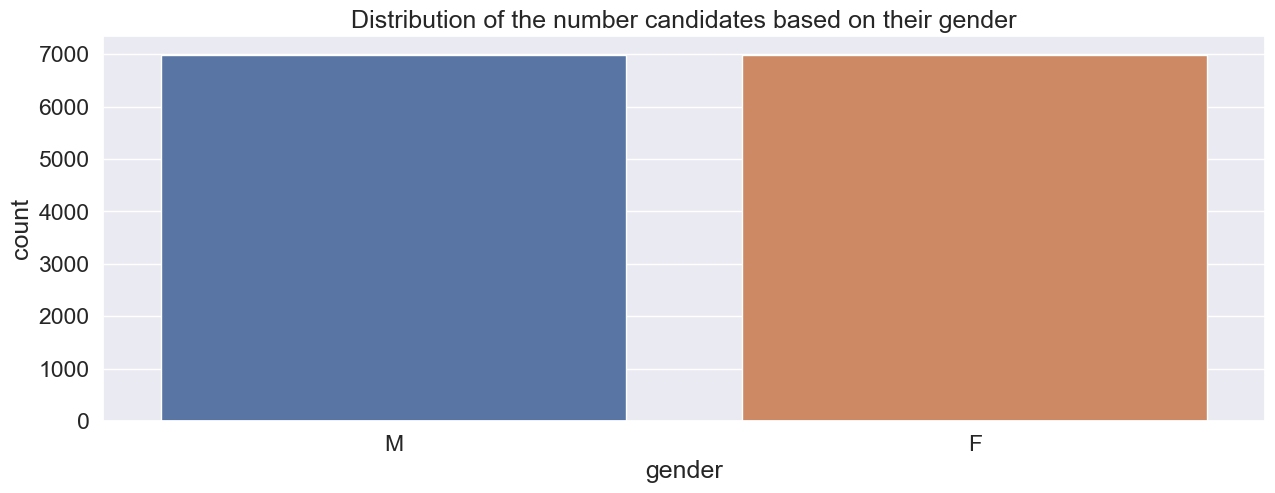

In [43]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='gender', data=df)
plt.title('Distribution of the number candidates based on their gender')
plt.show()

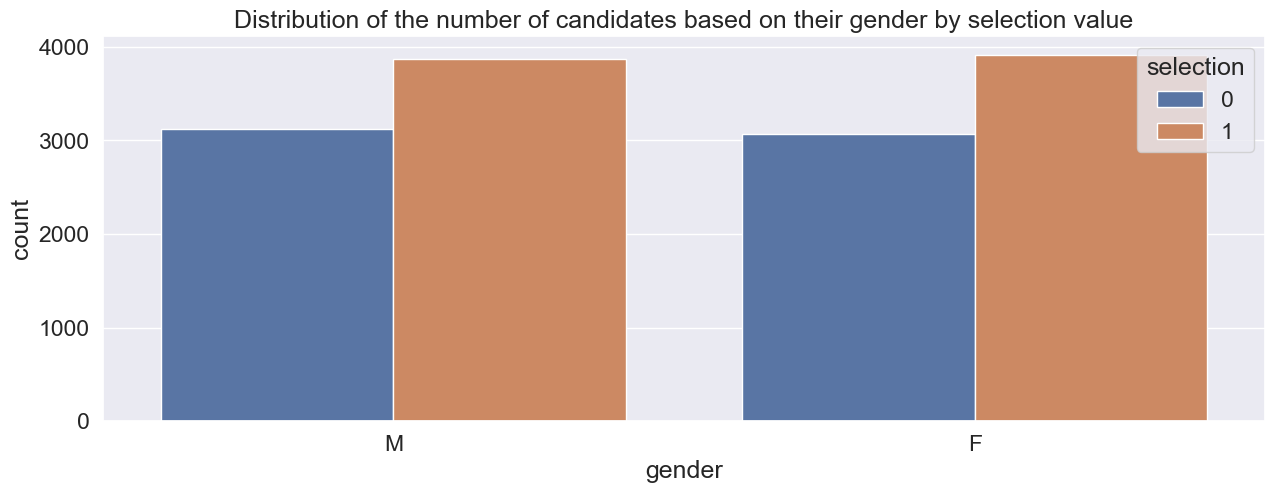

In [44]:
fig,ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(x='gender', hue='selection', data=df2)
plt.title('Distribution of the number of candidates based on their gender by selection value')
plt.show()


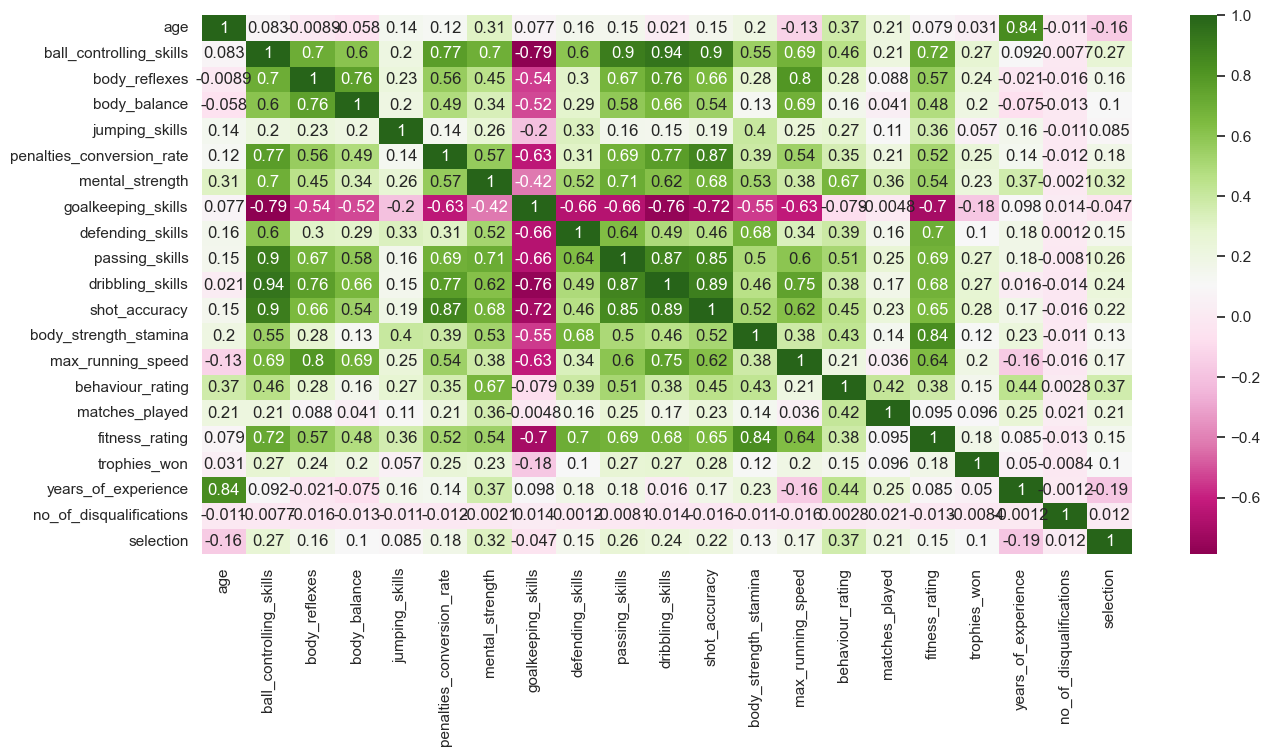

In [45]:
# Checking for correlation of each variables
plt.figure(figsize=(15,7))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), annot=True, cmap='PiYG');

# Preprocessing

In [46]:

df3 = pd.get_dummies(df2)# filling the null values by one hot encoding




In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
le = LabelEncoder()

In [49]:
df3['weight'] = le.fit_transform(df['weight'])
df3['ball_controlling_skills'] = le.fit_transform(df['ball_controlling_skills'])
df3['shot_accuracyt'] = le.fit_transform(df['shot_accuracy'])
df3['behaviour_rating'] = le.fit_transform(df['behaviour_rating'])
df3['matches_played'] = le.fit_transform(df['matches_played'])
df3['fitness_rating'] = le.fit_transform(df['fitness_rating'])
df3['years_of_experience'] = le.fit_transform(df['years_of_experience'])


#encoding the categorical columns

In [50]:
df3.isna().sum()

age                         0
ball_controlling_skills     0
body_reflexes               0
body_balance                0
jumping_skills             24
                           ..
coaching_Source             0
coaching_Talent Hunt        0
coaching_Unknown            0
weight                      0
shot_accuracyt              0
Length: 155, dtype: int64

In [51]:
df4=df3.dropna()

In [52]:
df2["height"] = df2["height"].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
df2["weight"] = df2["weight"].str.extract("(\d+)").astype(float)
#converting the datatype 

outlier handling

In [53]:
Q1=np.percentile(df2['age'],25,interpolation='midpoint')
Q2=np.percentile(df2['age'],50,interpolation='midpoint')
Q3=np.percentile(df2['age'],75,interpolation='midpoint')

In [54]:
print(Q1)
print(Q2)
print(Q3)

17.0
20.0
24.0


In [55]:
IQR=Q3-Q1

In [56]:
print(IQR)

7.0


In [57]:
up_lim=Q3+1.5*IQR
l_lim=Q1-1.5*IQR

In [58]:
print(up_lim)
print(l_lim)

34.5
6.5


In [59]:
outliers=[]
for val in df2['age']:
    if (val>up_lim) or (val<l_lim):
     outliers.append(val)

In [60]:
outliers


[51,
 36,
 36,
 52,
 57,
 54,
 57,
 57,
 57,
 35,
 54,
 50,
 36,
 36,
 57,
 39,
 49,
 36,
 55,
 57,
 53,
 35,
 57,
 35,
 55,
 57,
 57,
 36,
 54,
 48,
 35,
 36,
 36,
 59,
 53,
 60,
 55,
 48,
 36,
 57,
 35,
 36,
 37,
 57,
 57,
 59,
 36,
 35,
 35,
 54,
 57,
 57,
 36,
 57,
 57,
 35,
 57,
 57,
 58,
 51,
 57,
 57,
 35,
 61,
 55,
 60,
 39,
 51,
 57,
 51,
 57,
 57,
 57,
 38,
 55,
 56,
 57,
 57,
 60,
 57,
 57,
 51,
 50,
 56,
 57,
 36,
 58,
 50,
 57,
 57,
 35,
 57,
 57,
 57,
 57,
 61,
 53,
 57,
 35,
 35,
 57,
 57,
 36,
 57,
 58,
 35,
 57,
 57,
 57,
 57,
 35,
 35,
 55,
 56,
 40,
 57,
 35,
 56,
 51]

In [61]:
ind=df2[(df2['age']>up_lim)|(df2['age']<l_lim)]
ind.index

Int64Index([   75,   130,   235,   545,   607,   613,   668,   712,   714,
              737,
            ...
            12751, 12829, 12858, 12936, 13020, 13218, 13237, 13312, 13344,
            13954],
           dtype='int64', length=119)

In [62]:
df2['age']=np.where(df2['age']>up_lim, up_lim, np.where(df2['age']<l_lim, l_lim, df2['age']))#handling outliers of the feature age

In [63]:
#splitting data to afeature and target

In [64]:
x=df4.drop(['selection'],axis=1)
y=df4['selection']

training the data

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [66]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=50)
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

# analysing the model using confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('precision = ',precision_score(y_test,y_pred_lr,average='micro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='micro'))
print('f1 score =',f1_score(y_test,y_pred_lr,average='micro'))


Accuracy =  0.7594604720869239
precision =  0.7594604720869239
Recall =  0.7594604720869239
f1 score = 0.7594604720869239


In [68]:
confusion_matrix(y_test,y_pred_lr)

array([[ 801,  339],
       [ 303, 1226]], dtype=int64)

In [69]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [70]:
y_test

5588     1
1441     0
10610    0
3716     0
5721     1
        ..
2459     1
278      1
10206    0
10909    0
9428     1
Name: selection, Length: 2669, dtype: int64

# k-NN classification

In [71]:
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

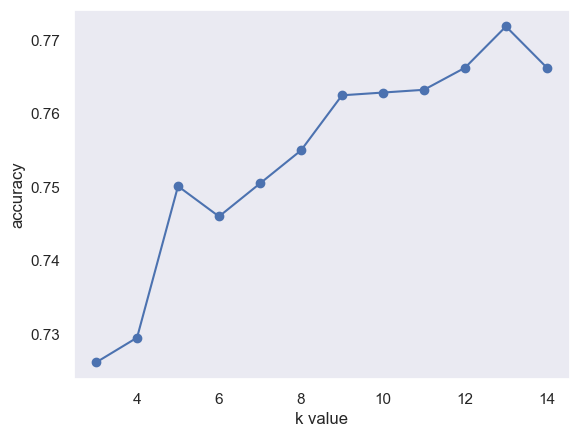

In [72]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [73]:
 classifier= KNeighborsClassifier(n_neighbors= 5, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
    

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='micro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='micro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='micro'))

Accuracy =  0.7500936680404646
precision =  0.7500936680404646
Recall =  0.7500936680404646
f1 score = 0.7500936680404646


In [75]:
confusion_matrix(y_test,y_pred_knn)

array([[ 827,  313],
       [ 354, 1175]], dtype=int64)

# SVM Model

In [76]:
#from sklearn.svm import SVC
#svmclf = SVC(kernel = 'linear')
#svmclf.fit(x_train, y_train)

In [77]:
#y_pred = svmclf.predict(x_test)

In [78]:
#from sklearn.metrics import accuracy_score, confusion_matrix
#print('Accuracy =', accuracy_score(y_test, y_pred))

In [80]:
#confusion_matrix(y_test, y_pred)

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [82]:
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)

In [83]:
print('Accuracy =', accuracy_score(y_test, y_pred_dt))

Accuracy = 0.8119145747470963


In [84]:
confusion_matrix(y_test, y_pred_dt)

array([[ 880,  260],
       [ 242, 1287]], dtype=int64)

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [86]:
y_pred_rf = rf_clf.predict(x_test)

In [87]:
print('Accuracy =', accuracy_score(y_test, y_pred_rf))

Accuracy = 0.8535031847133758


In [88]:
confusion_matrix(y_test, y_pred_rf)

array([[ 955,  185],
       [ 206, 1323]], dtype=int64)

In [89]:
rf_clfr = RandomForestClassifier(n_estimators= 10, max_depth= 20, criterion= 'entropy', min_samples_split= 3)
rf_clfr.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=10)

In [90]:
y_pred_rf1 = rf_clfr.predict(x_test)

In [91]:
print('Accuracy =', accuracy_score(y_test, y_pred_rf1))

Accuracy = 0.8284001498688648


# all of the classification method gives differeent acuracy scores
amongst the model random forest has acquired an accuracy score of 82 percentage. so we can take the random forest as the most suitable model for this problem
